In [1]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

In [2]:
!curl -o tiger.jpg https://files.worldwildlife.org/wwfcmsprod/images/Tiger_resting_Bandhavgarh_National_Park_India/hero_small/6aofsvaglm_Medium_WW226365.jpg
!curl -o dog.jpg https://i.natgeofe.com/n/3faa2b6a-f351-4995-8fff-36d145116882/domestic-dog_16x9.jpg

img_tiger = cv2.imread('tiger.jpg')
img_dog = cv2.imread('dog.jpg')

print('tiger :', img_tiger.shape[0], img_tiger.shape[1])
print('dog :', img_dog.shape[0], img_dog.shape[1])

# cv2.imshow('tiger.jpg', img)
# cv2.imshow('dog.jpg', img_dog)
# cv2.waitKey(0)
# cv2.destroyAllWindows()



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:04 --:--:--     0
100 80791  100 80791    0     0  17905      0  0:00:04  0:00:04 --:--:-- 17909


tiger : 480 640
dog : 1728 3072


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 38  439k   38  168k    0     0    99k      0  0:00:04  0:00:01  0:00:03   99k
 47  439k   47  208k    0     0  87131      0  0:00:05  0:00:02  0:00:03 87141
 84  439k   84  371k    0     0   107k      0  0:00:04  0:00:03  0:00:01  107k
100  439k  100  439k    0     0   110k      0  0:00:03  0:00:03 --:--:--  110k


Text(0.5, 1.0, 'Cb')

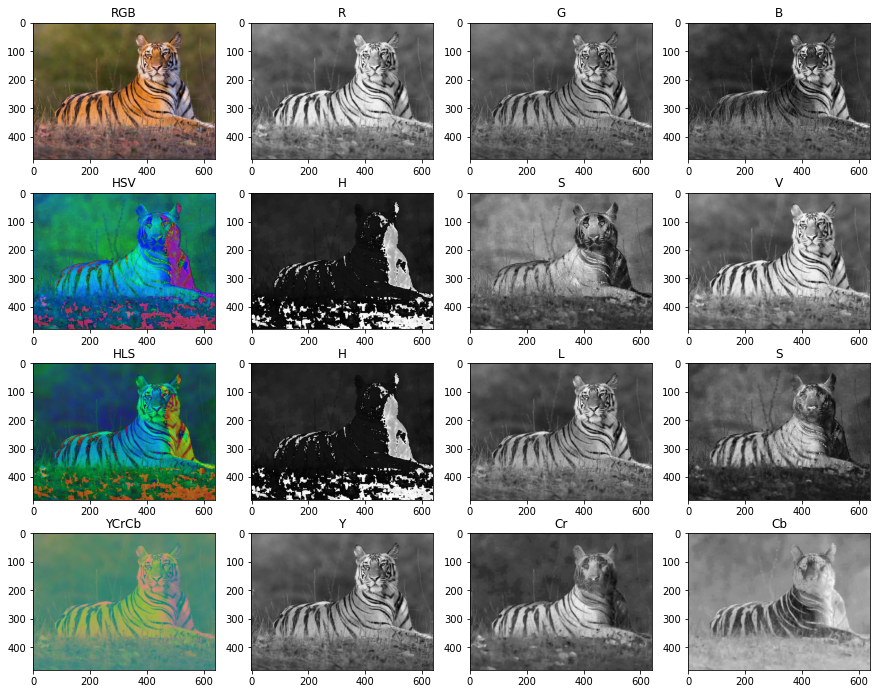

In [3]:
# Act 2.1

plt.figure(figsize=(15,12))

# RGB
img_RGB = cv2.cvtColor(img_tiger, cv2.COLOR_BGR2RGB)
plt.subplot(4,4,1)
plt.imshow(img_RGB, cmap='gray')
plt.title('RGB')

plt.subplot(4,4,2)
plt.imshow(img_RGB[:,:,0], cmap='gray')
plt.title('R')

plt.subplot(4,4,3)
plt.imshow(img_RGB[:,:,1], cmap='gray')
plt.title('G')

plt.subplot(4,4,4)
plt.imshow(img_RGB[:,:,2], cmap='gray')
plt.title('B')

# HSV
img_HSV = cv2.cvtColor(img_tiger, cv2.COLOR_BGR2HSV)
plt.subplot(4,4,5)
plt.imshow(img_HSV, cmap='gray')
plt.title('HSV')

plt.subplot(4,4,6)
plt.imshow(img_HSV[:,:,0], cmap='gray')
plt.title('H')

plt.subplot(4,4,7)
plt.imshow(img_HSV[:,:,1], cmap='gray')
plt.title('S')

plt.subplot(4,4,8)
plt.imshow(img_HSV[:,:,2], cmap='gray')
plt.title('V')


# HLS
img_HLS = cv2.cvtColor(img_tiger, cv2.COLOR_BGR2HLS)
plt.subplot(4,4,9)
plt.imshow(img_HLS, cmap='gray')
plt.title('HLS')

plt.subplot(4,4,10)
plt.imshow(img_HLS[:,:,0], cmap='gray')
plt.title('H')

plt.subplot(4,4,11)
plt.imshow(img_HLS[:,:,1], cmap='gray')
plt.title('L')

plt.subplot(4,4,12)
plt.imshow(img_HLS[:,:,2], cmap='gray')
plt.title('S')

# YCrCb
img_YCrCb = cv2.cvtColor(img_tiger, cv2.COLOR_BGR2YCrCb)
plt.subplot(4, 4, 13)
plt.imshow(img_YCrCb, cmap='gray')
plt.title('YCrCb')

plt.subplot(4, 4, 14)
plt.imshow(img_YCrCb[:,:,0], cmap='gray')
plt.title('Y')

plt.subplot(4, 4, 15)
plt.imshow(img_YCrCb[:,:,1], cmap='gray')
plt.title('Cr')

plt.subplot(4, 4, 16)
plt.imshow(img_YCrCb[:,:,2], cmap='gray')
plt.title('Cb')

In [41]:
# Act 2.2

# Image Resize
scale_percent = 30 # percent of original size
width = int(img_dog.shape[1] * scale_percent / 100)
height = int(img_dog.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
img_dog_resized = cv2.resize(img_dog, dim, interpolation = cv2.INTER_AREA)

# crop image
img_dog_cropped = img_dog_resized[20:500, 60:700]

print(img_tiger.shape[:2])
print(img_dog_cropped.shape[:2])

# cv2.imshow('cropped', img_dog_cropped)
# cv2.waitKey(0)

#### Video Writer
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('out_video.mp4', fourcc, 120.0, (640, 480))

# loop for add each image
for i in range(50):
    weight = 0.02 * (i+1) 
    res = cv2.addWeighted(img_tiger, weight, img_dog_cropped, 1 - weight, 0)
    out.write(res)

for i in range(50):
    weight = 0.02 * (i+1) 
    res = cv2.addWeighted(img_tiger, 1 - weight, img_dog_cropped, weight, 0)
    out.write(res)

# Export video
out.release()

(480, 640)
(480, 640)


-1

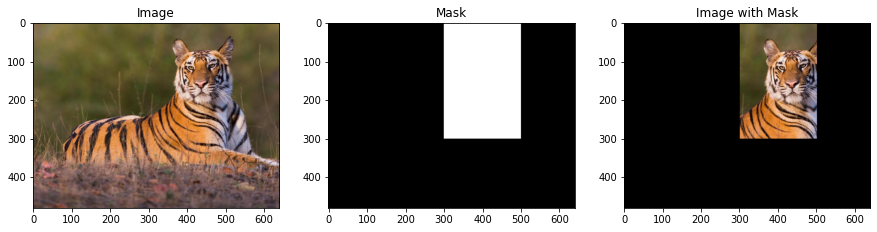

In [113]:
# Act 2.3

# RGB_img.shape
zero_array=np.zeros((480,640,3),  dtype= np.uint8)
zero_array
for rol in range(0,300):
    for col in range(300,500):
        zero_array[rol][col] = (255,255,255)

im_obj_area = cv2.bitwise_and(img_tiger, zero_array)
# cv2.imshow("window",im_obj_area)
# cv2.waitKey(0)

plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.imshow(img_tiger, cmap='gray')
plt.title('Image')

plt.subplot(1,3,2)
plt.imshow(zero_array)
plt.title('Mask')

plt.subplot(1,3,3)
plt.imshow(im_obj_area, cmap='gray')
plt.title('Image with Mask')
cv2.waitKey(0)


# print(white_array(6,5))